In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData
from sqlalchemy import Table
from sqlalchemy import select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare automap base
Base = automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement_table = Base.classes.measurement
station_table = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement_table.date)).scalar()
recent_date

'2017-08-23'

Text(0, 0.5, 'Precipitation')

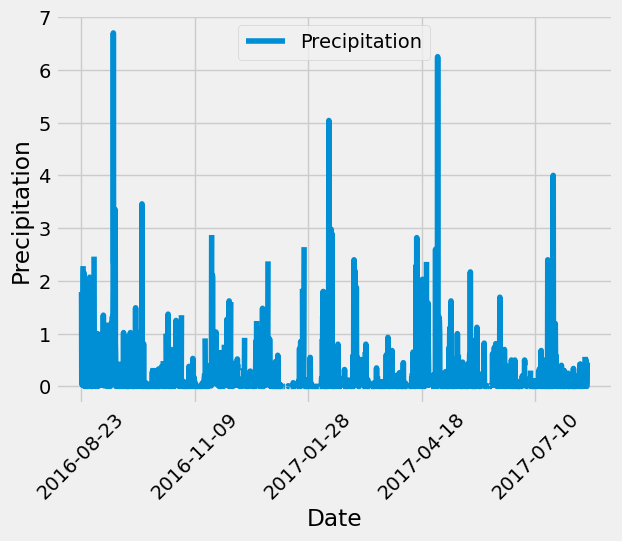

In [11]:
# Set date from a year ago
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Get date and precip. data
data = session.query(measurement_table.date, measurement_table.prcp).filter(measurement_table.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
weather_df = pd.DataFrame(data, columns=['Date', 'Precipitation'])
weather_df.set_index('Date', inplace=True)

# Sort the dataframe by date
weather_df = weather_df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot(label = 'Precipitation')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Precipitation")

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = weather_df.describe()
summary_stats

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(func.count(station_table.id)).scalar()
number_stations

9

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = select([measurement_table.station, func.count()]).group_by(measurement_table.station)
results = session.execute(query).fetchall()

station_count_df = pd.DataFrame(results)
station_count_df = station_count_df.sort_values(by='count', ascending=False)
station_count_df

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement_table.tobs)).where(measurement_table.station == "USC00519281").scalar()
highest_temp = session.query(func.max(measurement_table.tobs)).where(measurement_table.station == "USC00519281").scalar()
average_temp = session.query(func.avg(measurement_table.tobs)).where(measurement_table.station == "USC00519281").scalar()
print(f"Data for station ID USC00519281: Lowest temp = {lowest_temp}, Highest temp = {highest_temp}, and Average temp = {average_temp}")

Data for station ID USC00519281: Lowest temp = 54.0, Highest temp = 85.0, and Average temp = 71.66378066378067


Text(0, 0.5, 'Frequency')

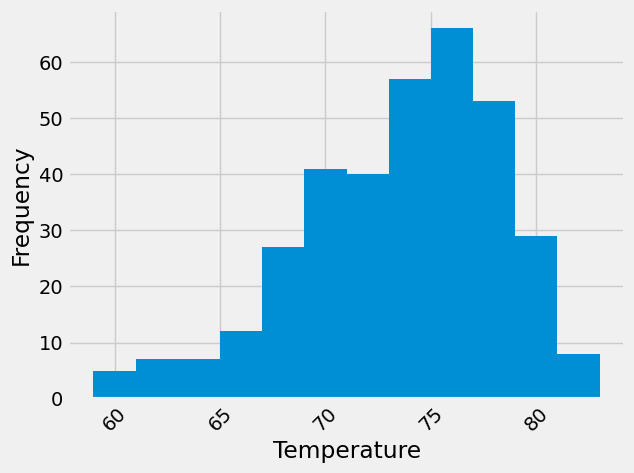

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement_table.station, measurement_table.tobs, measurement_table.date).filter(measurement_table.station == "USC00519281")
station_only = active_station.where(measurement_table.date >= year_ago).all()

active_station_df = pd.DataFrame(station_only, columns=['Temperature', 'Station', 'Date'])
active_station_df.set_index('Date', inplace=True)
active_station_df = active_station_df.sort_values("Date")
active_station_df = active_station_df.drop('Temperature', axis=1)
active_station_df = active_station_df.rename(columns={'Station': 'Temperature'})

plt.hist(active_station_df, bins=12)
plt.xticks(rotation=45)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Close Session

In [17]:
# Close Session
session.close()